<a href="https://colab.research.google.com/github/Blutronics/BakeryAssociationRule/blob/main/bakery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv('Bakery.csv')
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [18]:
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [19]:
dfti=df[['TransactionNo','Items']]
dfti.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [20]:
dfti.TransactionNo.groupby(dfti.Items)

In [21]:
#dfti=pd.get_dummies(dfti,drop_first=True)
dfti.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [22]:
items=[]
for i in dfti.groupby('TransactionNo')['Items'].apply(list):
    items.append(i)
items

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Tartine', 

In [23]:
all_items=[i for item in items for i in item]
all_items


['Bread',
 'Scandinavian',
 'Scandinavian',
 'Hot chocolate',
 'Jam',
 'Cookies',
 'Muffin',
 'Coffee',
 'Pastry',
 'Bread',
 'Medialuna',
 'Pastry',
 'Muffin',
 'Medialuna',
 'Pastry',
 'Coffee',
 'Tea',
 'Pastry',
 'Bread',
 'Bread',
 'Muffin',
 'Scandinavian',
 'Medialuna',
 'Bread',
 'Medialuna',
 'Bread',
 'Jam',
 'Coffee',
 'Tartine',
 'Pastry',
 'Tea',
 'Basket',
 'Bread',
 'Coffee',
 'Bread',
 'Medialuna',
 'Pastry',
 'Mineral water',
 'Scandinavian',
 'Bread',
 'Medialuna',
 'Coffee',
 'Hot chocolate',
 'Farm House',
 'Farm House',
 'Bread',
 'Bread',
 'Medialuna',
 'Coffee',
 'Coffee',
 'Medialuna',
 'Bread',
 'Jam',
 'Scandinavian',
 'Muffin',
 'Bread',
 'Scandinavian',
 'Fudge',
 'Scandinavian',
 'Coffee',
 'Bread',
 'Bread',
 'Jam',
 'Bread',
 'Basket',
 'Scandinavian',
 'Muffin',
 'Coffee',
 'Coffee',
 'Muffin',
 'Muffin',
 'Scandinavian',
 'Tea',
 'Bread',
 'Coffee',
 'Bread',
 'Bread',
 'Tea',
 'Scandinavian',
 'Juice',
 'Tartine',
 'Coffee',
 'Muffin',
 'Scandinavian',

In [24]:
from collections import Counter

In [25]:
item_frequencies=Counter(all_items)
item_frequencies

Counter({'Adjustment': 1,
         'Afternoon with the baker': 44,
         'Alfajores': 369,
         'Argentina Night': 7,
         'Art Tray': 38,
         'Bacon': 1,
         'Baguette': 152,
         'Bakewell': 48,
         'Bare Popcorn': 5,
         'Basket': 6,
         'Bowl Nic Pitt': 2,
         'Bread': 3325,
         'Bread Pudding': 4,
         'Brioche and salami': 3,
         'Brownie': 379,
         'Cake': 1025,
         'Caramel bites': 3,
         'Cherry me Dried fruit': 3,
         'Chicken Stew': 123,
         'Chicken sand': 1,
         'Chimichurri Oil': 2,
         'Chocolates': 10,
         'Christmas common': 11,
         'Coffee': 5471,
         'Coffee granules ': 7,
         'Coke': 185,
         'Cookies': 540,
         'Crepes': 6,
         'Crisps': 14,
         'Drinking chocolate spoons ': 8,
         'Duck egg': 12,
         'Dulce de Leche': 13,
         'Eggs': 28,
         "Ella's Kitchen Pouches": 17,
         'Empanadas': 7,
         'Extra S

In [26]:
item_frequencies=sorted(item_frequencies.items(),key=lambda x:x[1])
item_frequencies

[('Chicken sand', 1),
 ('The BART', 1),
 ('Adjustment', 1),
 ('Bacon', 1),
 ('Olum & polenta', 1),
 ('Polenta', 1),
 ('Gift voucher', 1),
 ('Raw bars', 1),
 ('Fairy Doors', 2),
 ('Bowl Nic Pitt', 2),
 ('Chimichurri Oil', 2),
 ('Spread', 2),
 ('Siblings', 2),
 ('Hack the stack', 2),
 ('Caramel bites', 3),
 ('Brioche and salami', 3),
 ('Raspberry shortbread sandwich', 3),
 ('Cherry me Dried fruit', 3),
 ('Bread Pudding', 4),
 ('Bare Popcorn', 5),
 ('Panatone', 5),
 ('Mortimer', 5),
 ('Basket', 6),
 ('Honey', 6),
 ('Lemon and coconut', 6),
 ('Crepes', 6),
 ('Pintxos', 6),
 ('Half slice Monster ', 6),
 ('Victorian Sponge', 7),
 ('Empanadas', 7),
 ('Coffee granules ', 7),
 ('Argentina Night', 7),
 ('Muesli', 8),
 ('Nomad bag', 8),
 ('Drinking chocolate spoons ', 8),
 ('Gingerbread syrup', 9),
 ('Postcard', 10),
 ('Chocolates', 10),
 ('Mighty Protein', 11),
 ('Christmas common', 11),
 ('Tacos/Fajita', 11),
 ('Pick and Mix Bowls', 12),
 ('Kids biscuit', 12),
 ('Duck egg', 12),
 ('Dulce de Lec

In [27]:
itemfreqs=list(reversed([i[1] for i in item_frequencies]))
item=list(reversed([i[0] for i in item_frequencies]))
itemfreqs[0:12]

[5471, 3325, 1435, 1025, 856, 771, 616, 590, 540, 379, 374, 370]

In [28]:
import matplotlib.pyplot as plt

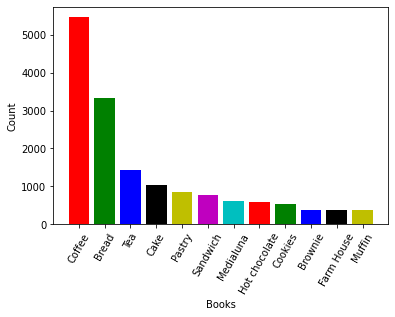

In [32]:
plt.bar(height = itemfreqs[0:12], x = list(range(0, 12)), color = list('rgbkymc'))
plt.xticks(list(range(0, 12), ), item[0:12],rotation=60)
plt.xlabel("Books")
plt.ylabel("Count")
plt.show()

In [33]:
item_series=pd.DataFrame(pd.Series(items))
item_series=item_series.iloc[:1579,:]
item_series

,0
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
...,...
1574,[Farm House]
1575,"[Bread, Soup, Alfajores]"
1576,"[Coke, Coffee, Medialuna, Cake]"
1577,"[Scandinavian, Alfajores, Alfajores]"


In [34]:
item_series.columns=["transactions"]

In [35]:
X=item_series["transactions"].str.join(sep='*').str.get_dummies(sep='*')
X

,Adjustment,Alfajores,Art Tray,Bacon,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brownie,Cake,...,Scandinavian,Siblings,Smoothies,Soup,Spread,Tartine,Tea,The BART,Truffles,Victorian Sponge
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1575,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1576,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1577,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [41]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets=apriori(X, min_support=0.01, max_len=4, use_colnames=True)

In [42]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)

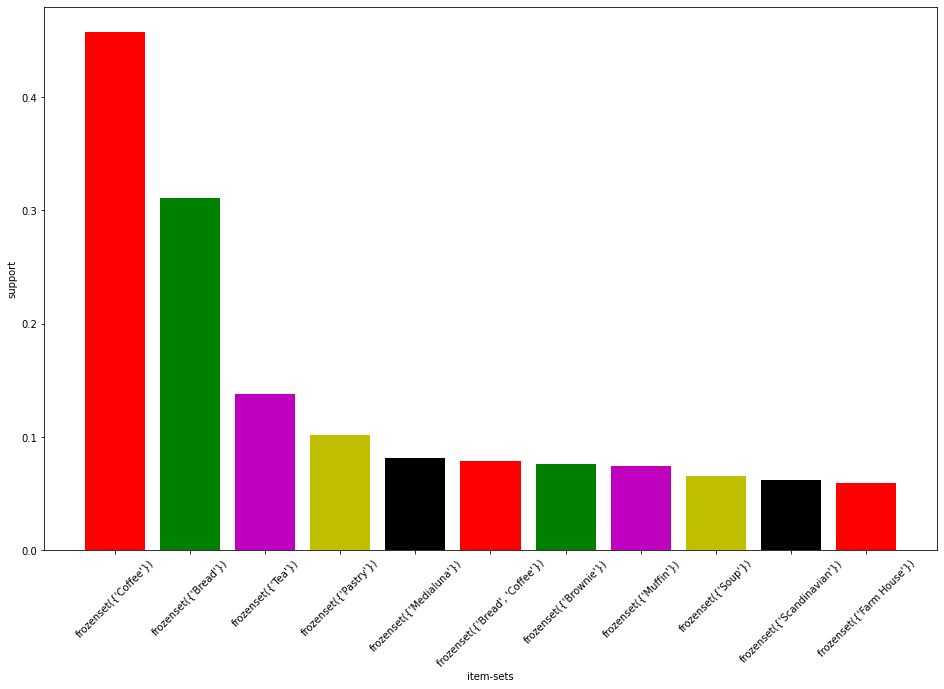

In [43]:
plt.figure(figsize=(16, 10))
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color =list('rgmyk'))
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=45)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [44]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,"(Bread, Coffee)",(Medialuna),0.078531,0.081697,0.013300,0.169355,2.072956,0.006884,1.105529
34,(Medialuna),"(Bread, Coffee)",0.081697,0.078531,0.013300,0.162791,2.072956,0.006884,1.100644
22,(Pastry),(Medialuna),0.101963,0.081697,0.017099,0.167702,2.052723,0.008769,1.103334
23,(Medialuna),(Pastry),0.081697,0.101963,0.017099,0.209302,2.052723,0.008769,1.135752
42,(Sandwich),(Tea),0.038632,0.138062,0.010133,0.262295,1.899835,0.004799,1.168405
43,(Tea),(Sandwich),0.138062,0.038632,0.010133,0.073394,1.899835,0.004799,1.037516
29,(Soup),(Tea),0.065231,0.138062,0.015199,0.233010,1.687717,0.006194,1.123792
28,(Tea),(Soup),0.138062,0.065231,0.015199,0.110092,1.687717,0.006194,1.050410
30,(Keeping It Local),(Coffee),0.018999,0.457251,0.014566,0.766667,1.676685,0.005879,2.326065
31,(Coffee),(Keeping It Local),0.457251,0.018999,0.014566,0.031856,1.676685,0.005879,1.013280
